In [2]:
!pip install torch==1.5.1+cpu torchvision==0.6.1+cpu -f https://download.pytorch.org/whl/torch_stable.html
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'


import torch

Looking in links: https://download.pytorch.org/whl/torch_stable.html


D:\3-2\ML1\lib\site-packages\wheel\pep425tags.py:82: RuntimeWarning: Config variable 'Py_DEBUG' is unset, Python ABI tag may be incorrect
  warn=(impl == 'cp')):
D:\3-2\ML1\lib\site-packages\wheel\pep425tags.py:87: RuntimeWarning: Config variable 'WITH_PYMALLOC' is unset, Python ABI tag may be incorrect
  sys.version_info < (3, 8))) \


In [3]:
import torch
import torch.nn.init
from torch.autograd import Variable

In [4]:
import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms
torch.manual_seed(8)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [6]:
# MNIST dataset
mnist_train = dsets.MNIST(root='data/',
                          train=True,
                          transform=transforms.ToTensor(),         ### This is Training Data
                          download=True)

mnist_test = dsets.MNIST(root='data/',
                         train=False,                              ### This is for test data
                         transform=transforms.ToTensor(),
                         download=True)

torch.Size([60000, 28, 28])
torch.Size([60000])


Text(0.5, 1.0, '5')

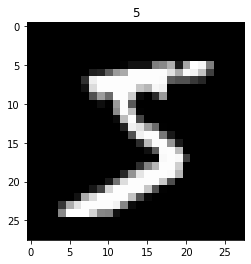

In [9]:
print(mnist_train.train_data.size())
print(mnist_train.train_labels.size())

idx=0  ### Here idx is kept 0. you can change it for other examoles, and to get other pictures.
plt.imshow(mnist_train.train_data[idx,:,:].numpy(), cmap='gray')
plt.title('%i' % mnist_train.train_labels[idx])

In [10]:
batch_size = 100   ### batch_size is kept 100

data_loader  = torch.utils.data.DataLoader(dataset=mnist_train,   ## Here i am loading the train data
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=1)

torch.Size([100, 1, 28, 28])
torch.Size([100])


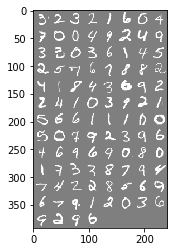

array([3, 2, 3, 2, 1, 6, 0, 4, 7, 0, 0, 4, 9, 2, 4, 9, 3, 3, 0, 3, 6, 1,
       4, 5, 2, 5, 7, 6, 7, 8, 8, 2, 4, 1, 8, 4, 3, 6, 9, 2, 2, 4, 1, 0,
       3, 9, 2, 1, 5, 6, 6, 1, 1, 1, 0, 0, 5, 0, 7, 9, 2, 3, 9, 6, 4, 6,
       9, 6, 9, 0, 8, 0, 1, 7, 3, 3, 8, 7, 9, 4, 7, 4, 2, 2, 8, 5, 6, 9,
       6, 7, 9, 1, 2, 0, 3, 6, 9, 2, 9, 6], dtype=int64)

In [11]:
## This is for image viewing. And for the array.
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
batch_images, batch_labels = next(iter(data_loader))

print(batch_images.size())
print(batch_labels.size())  ## we kept it 100 before

imshow(utils.make_grid(batch_images))
batch_labels.numpy()       ## The array with 100 numbers

In [12]:
linear1 = torch.nn.Linear(784, 512, bias = True) ## input is 784 unit and output is 512 unit
linear2 = torch.nn.Linear(512, 10, bias = True)  ## input is 512 unit and output is 10 unit
relu = torch.nn.ReLU()

## Here Is Our Simple Neural Network. Here I will Use Linear->Relu->Linear 

model = torch.nn.Sequential(linear1, relu, linear2)

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=10, bias=True)
)


In [13]:
cost_func = torch.nn.CrossEntropyLoss() ## This is for the cost

In [14]:
learning_rate = 0.001  
training_epochs = 5

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) ## We Will be Using Adam Optimzation algo

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(mnist_train) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(data_loader):
        
        X = Variable(batch_images.view(-1, 28 * 28)) ## Jkhn amra jani na je row koita. but col ase 28*28
        Y = Variable(batch_labels)
        
        optimizer.zero_grad()  ## backpropagation er surute gradient ke 0 kortesi
        Y_prediction = model(X) ## oi 3 ta step hoitese one after another. Linear->RELU->Linear
        cost = cost_func(Y_prediction, Y) ## cost function use kore cost ber krlam
        cost.backward()  ##backward propagation
        optimizer.step() ##Optimization
        
        avg_cost += cost / total_batch ## cost ke 100 diye vag korlam. jate avg_cost ase
        
    print("[Epoch: {:>2}] cost = {:>.9}".format(epoch + 1, avg_cost.data)) 
    


[Epoch:  1] cost = 0.289391756
[Epoch:  2] cost = 0.114346288
[Epoch:  3] cost = 0.0738303065
[Epoch:  4] cost = 0.0531430729
[Epoch:  5] cost = 0.0402375944


In [15]:
## Ekhn Test set ke chalaia Dekbo
correct = 0     ## koita test correct Hoise
total = 0       ## total Koita test ase
for images, labels in mnist_test:
    images  = Variable(images.view(-1, 28 * 28))
    outputs = model(images)   ## Same model theke je Output ase.
    _, predicted = torch.max(outputs.data, 1)
    total += 1
    correct += (predicted == labels).sum()   
    
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 97 %


..\aten\src\ATen\native\BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.


In [16]:
## This is for random testing . Random values will be in X_single_data and Y_single_data
r = random.randint(0, len(mnist_test)-1)
X_single_data = Variable(mnist_test.test_data[r:r + 1].view(-1,28*28).float())
Y_single_data = Variable(mnist_test.test_labels[r:r + 1])

D:\3-2\ML1\lib\site-packages\torchvision\datasets\mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
D:\3-2\ML1\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Label :  [7]
Prediction :  [7]


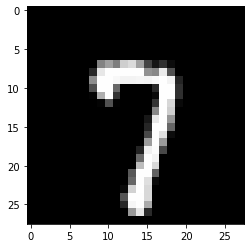

In [17]:
single_prediction = model(X_single_data)
plt.imshow(X_single_data.data.view(28,28).numpy(), cmap='gray')

print('Label : ', Y_single_data.data.view(1).numpy())
print('Prediction : ', torch.max(single_prediction.data, 1)[1].numpy())

0


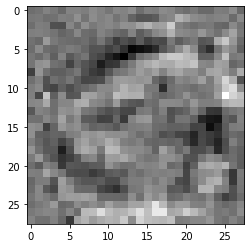

1


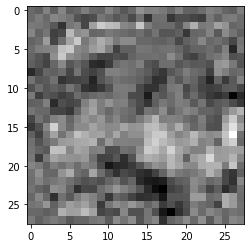

2


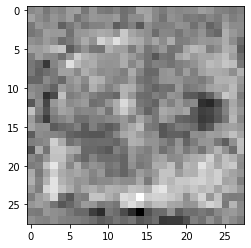

3


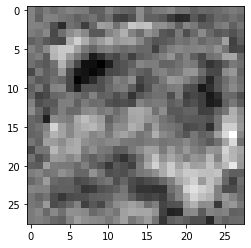

4


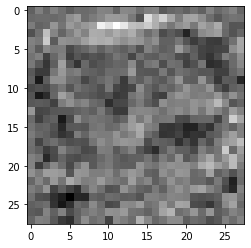

5


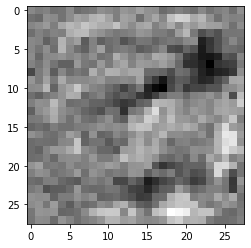

6


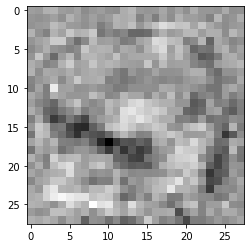

7


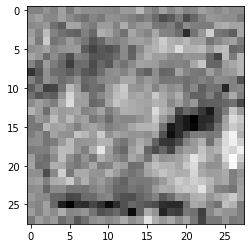

8


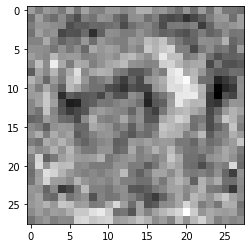

9


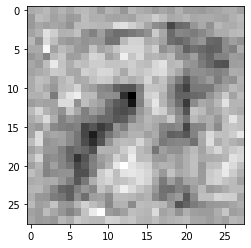

10


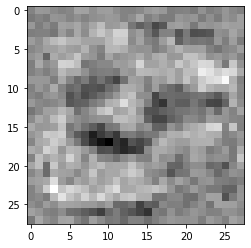

11


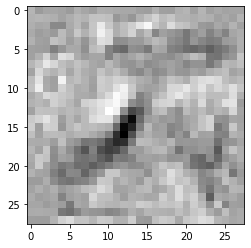

12


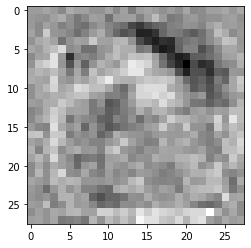

13


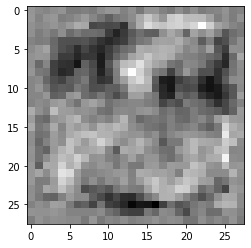

14


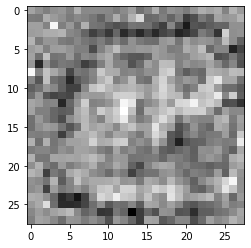

15


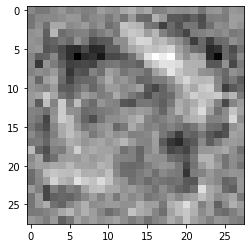

16


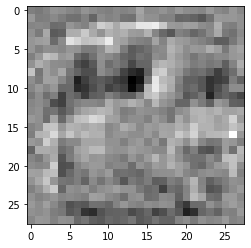

17


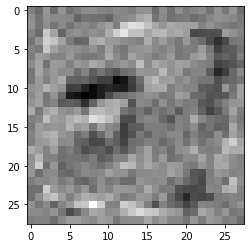

18


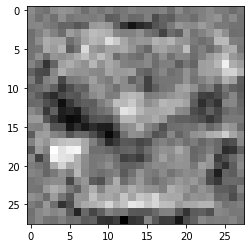

19


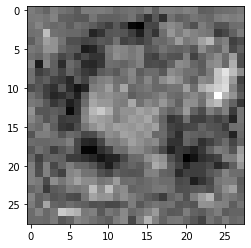

In [18]:
## for 20 images
for i in range(20):
    weight = model[0].weight[i, :].data.view(28,28)
    weight = (weight - torch.min(weight))/(torch.max(weight)-torch.min(weight))
    print(i)
    plt.imshow(weight.numpy(), cmap='gray')
    plt.show()